In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification


import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import glob, os
import re
import time

In [26]:
data = pd.read_csv("C:\\Users\\aaron\\Desktop\\CyreneHackathonCompleted\\tDataFrame.csv", encoding="latin-1")

X = data[["File size", "mov", "push", "pop", "lea", "add", "sub", "inc", "dec", "imul", "idiv","and", "or", "xor", "not", "neg", "shl", "shr", "jmp", "jcondition", "cmp", "call", "ret"]]

Y = data[["Class"]]

X, Y = make_classification(n_samples=X.shape[0], n_features=23, random_state=5)

le = LabelEncoder()
Y = le.fit_transform(Y)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, Y)

pred = xgb_model.predict(X)

scores = cross_val_score(xgb_model, X, Y, cv=10, scoring="accuracy")
print("Cross val scores: {0}".format(scores))
print("Mean cross val score: {0}".format(scores.mean()))

Cross val scores: [0.98819362 0.98701299 0.98819362 0.98465171 0.98465171 0.98819362
 0.98701299 0.98465171 0.98347107 0.98819362]
Mean cross val score: 0.98642266824085


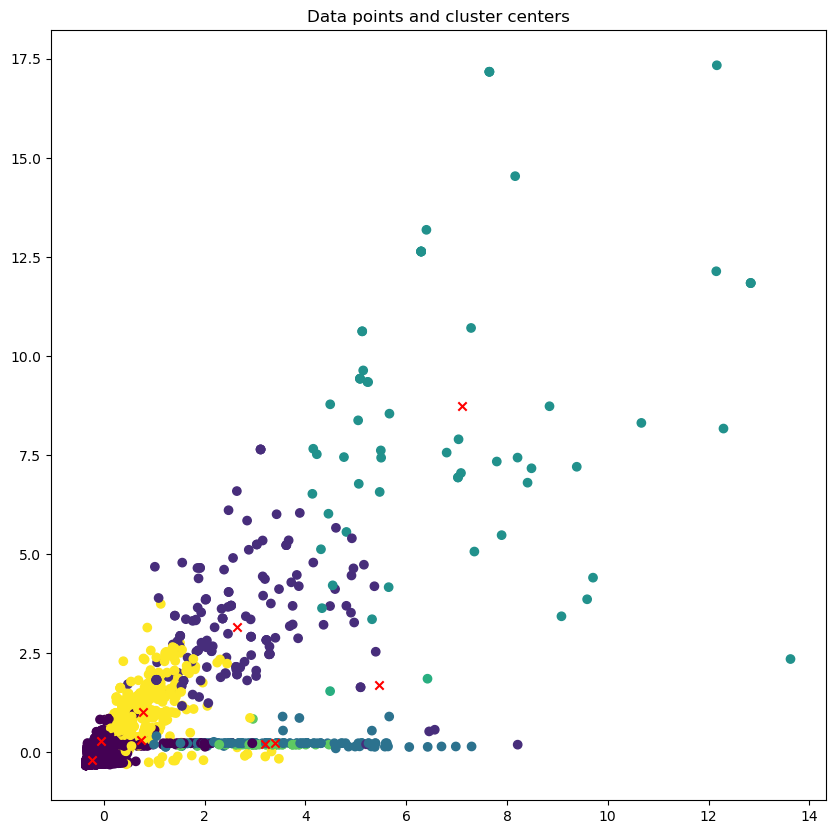

Silhouette score: 0.778395115310639


In [22]:
# K-Means clusttering #

data = pd.read_csv("C:\\Users\\aaron\\Desktop\\CyreneHackathonCompleted\\tDataFrame.csv", encoding="latin-1")
X = data[["mov", "push", "pop", "lea", "add", "sub", "inc", "dec", "imul", "idiv",
          "and", "or", "xor", "not", "neg", "shl", "shr", "jmp", "jcondition", "cmp", "call", "ret"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=9, random_state=1).fit(X_scaled)

f = matplotlib.pyplot.figure()
f.set_figwidth(10)
f.set_figheight(10)

matplotlib.pyplot.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_.astype(float))
matplotlib.pyplot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

matplotlib.pyplot.title('Data points and cluster centers')
matplotlib.pyplot.show()

print("Silhouette score: {0}".format(silhouette_score(X_scaled, kmeans.labels_)))

In [27]:
data = pd.read_csv("C:\\Users\\aaron\\Desktop\\CyreneHackathonCompleted\\tDataFrame.csv", encoding="latin-1")

X = data[["File size", "mov", "push", "pop", "lea", "add", "sub", "inc", "dec", "imul", "idiv","and", "or", "xor", "not", "neg", "shl", "shr", "jmp", "jcondition", "cmp", "call", "ret"]]

Y = data[["Class"]]

X, Y = make_classification(n_samples=X.shape[0], n_features=23, random_state=6)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=16)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

pred = xgb_model.predict(X_test)
         
print("Training score: {0}    Test score accuracy: {1}".format(xgb_model.score(X_train, Y_train), xgb_model.score(X_test, Y_test)))

c_matrix = confusion_matrix(Y_test, pred)

TP = c_matrix[0,0]
TN = c_matrix[1,1]
FP = c_matrix[0,1]
FN = c_matrix[1,0]

print("TP: {0}   TN: {1}   FP: {2}   FN: {3}".format(TP, TN, FP, FN))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score (more about positive class)
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall/Sensitivity : {0:0.4f}'.format(recall))

#scores = cross_val_score(xgb_model, X_train, Y_train, cv=5, scoring="accuracy")
#print("Cross val scores: {0}".format(scores))

Training score: 1.0    Test score accuracy: 0.9811097992916175
TP: 398   TN: 433   FP: 12   FN: 4
Classification error : 0.0189
Precision : 0.9707
Recall/Sensitivity : 0.9900
